## **import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

from pandas_profiling import ProfileReport
%matplotlib inline

## **Read Dataset**

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.shape

(1338, 7)

## **Missing values**

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## **Detecting outliers**

<AxesSubplot:>

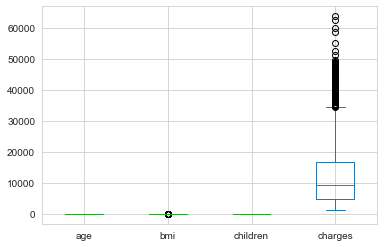

In [8]:
sns.set_style("whitegrid")
data.plot.box()

### Looks like we've got outliers in the two features *bmi* and *charges*

### We can use another method to detect outliers in the data

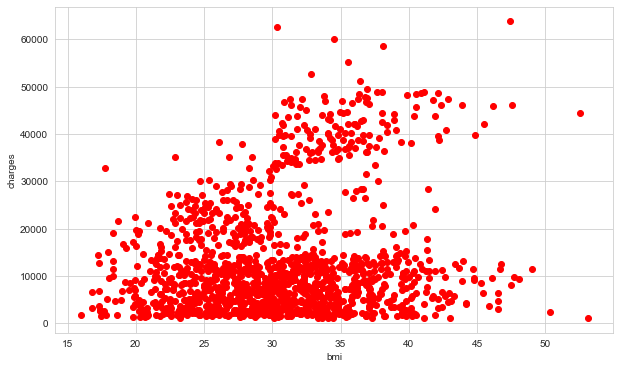

In [9]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(data['bmi'],data['charges'],color = 'red')
ax.set_xlabel("bmi")
ax.set_ylabel("charges")
plt.show()

looking at the plot above we can say that outliers are those which are far from the rest of the population. like the points at the top most, right most position.

### now let's see them individually

<AxesSubplot:xlabel='bmi'>

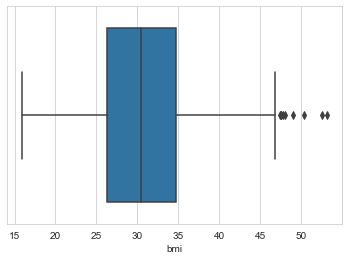

In [10]:
sns.boxplot(x = data['bmi'])

<AxesSubplot:xlabel='charges'>

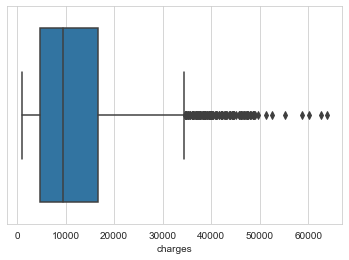

In [11]:
sns.boxplot(x = data['charges'])

### now look at the  charges by different regions

C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


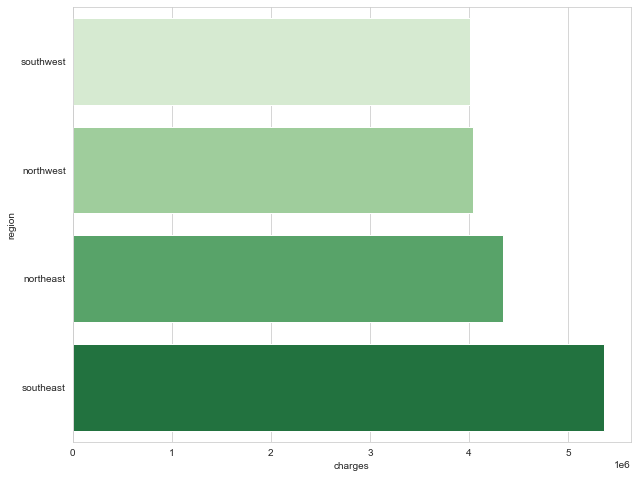

In [12]:
charges = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
f , ax = plt.subplots(1,1,figsize = (10,8))
ax = sns.barplot(charges.head(), charges.head().index, palette = 'Greens')

**so it is clear that charges in southwest is lowest and charges in southeast it is highest**

**now considering other factors too. let's see how it changes** 

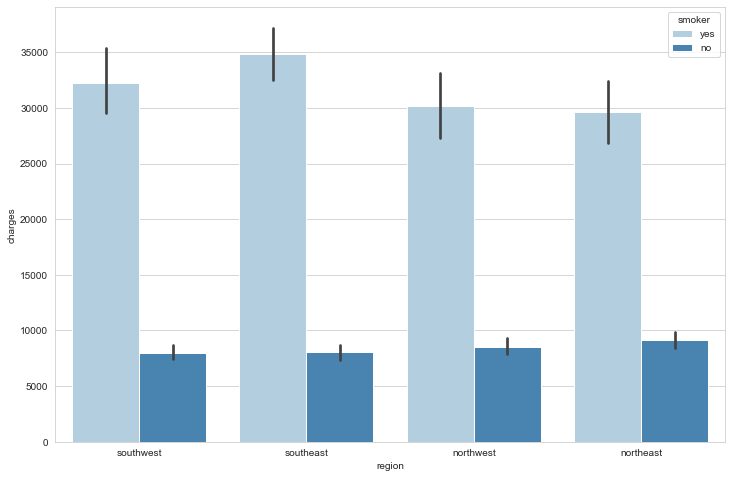

In [13]:
f , ax = plt.subplots(1,1, figsize = (12,8))
ax = sns.barplot(x = 'region' , y = 'charges', hue = 'smoker', data = data , palette = 'Blues')

**Doint the same for children**

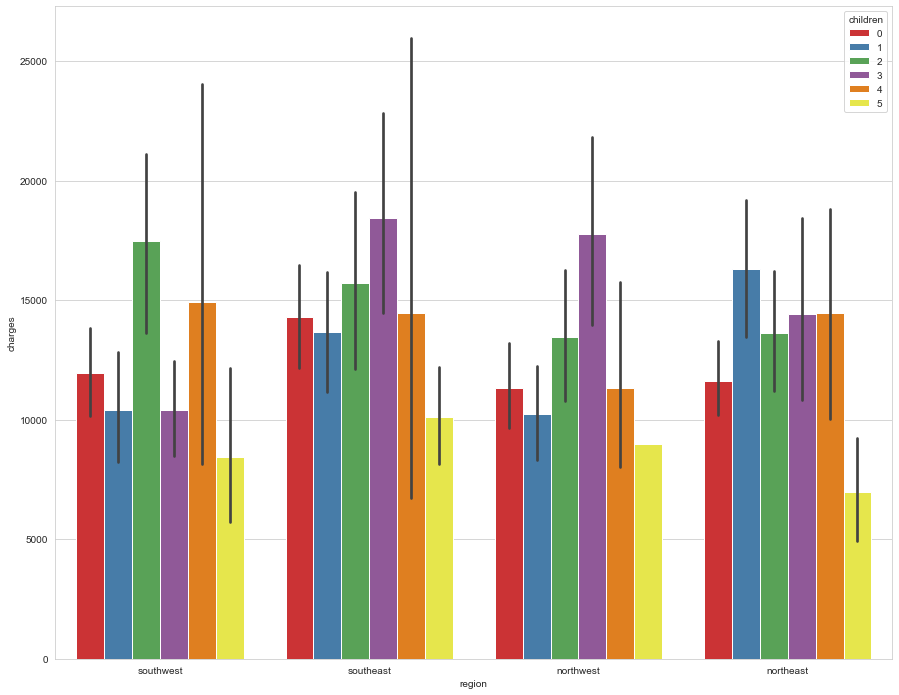

In [14]:
f , ax = plt.subplots(1,1,figsize = (15,12))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data =data, palette = 'Set1')

**Now let's analyze the medical charges by age, bmi(body mass index) and children according to the smoking factor**

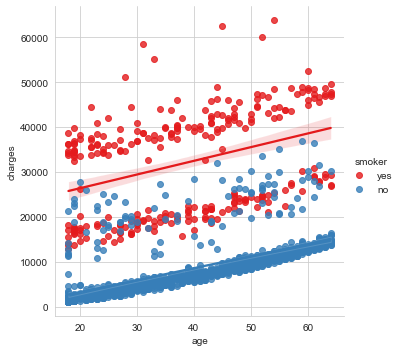

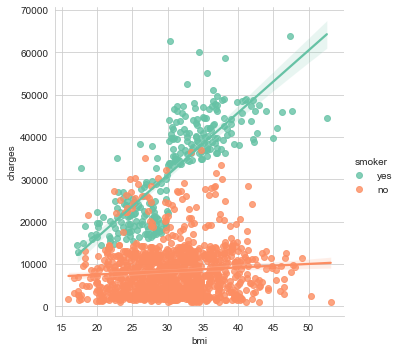

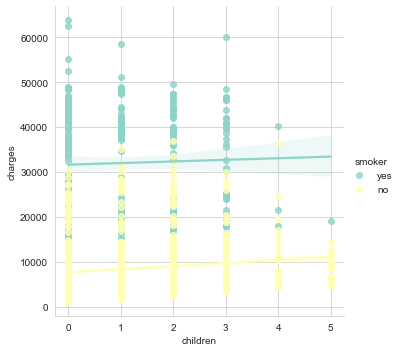

In [15]:
ax = sns.lmplot(x = 'age', y = 'charges' , hue = 'smoker', data = data, palette = 'Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges' , hue = 'smoker', data = data, palette = 'Set2')
ax = sns.lmplot(x = 'children', y = 'charges' , hue = 'smoker', data = data, palette = 'Set3')

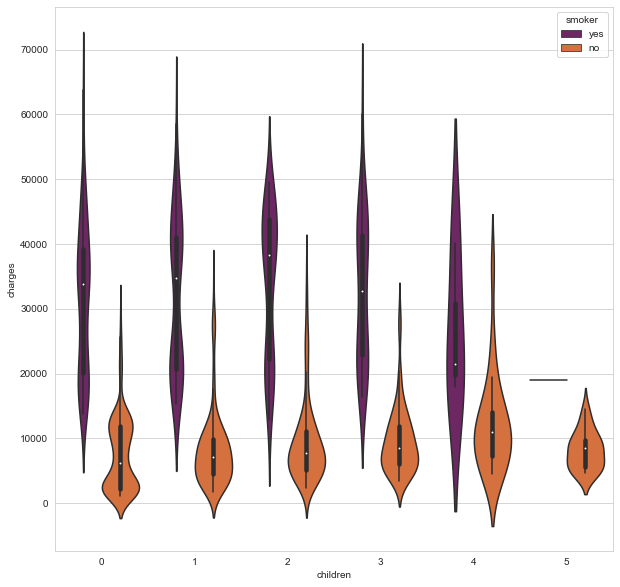

In [16]:
f,ax=plt.subplots(1,1,figsize=(10,10))
ax=sns.violinplot(x='children',y='charges',data=data,orient='v',hue='smoker',palette='inferno')

### Now look at the whole data

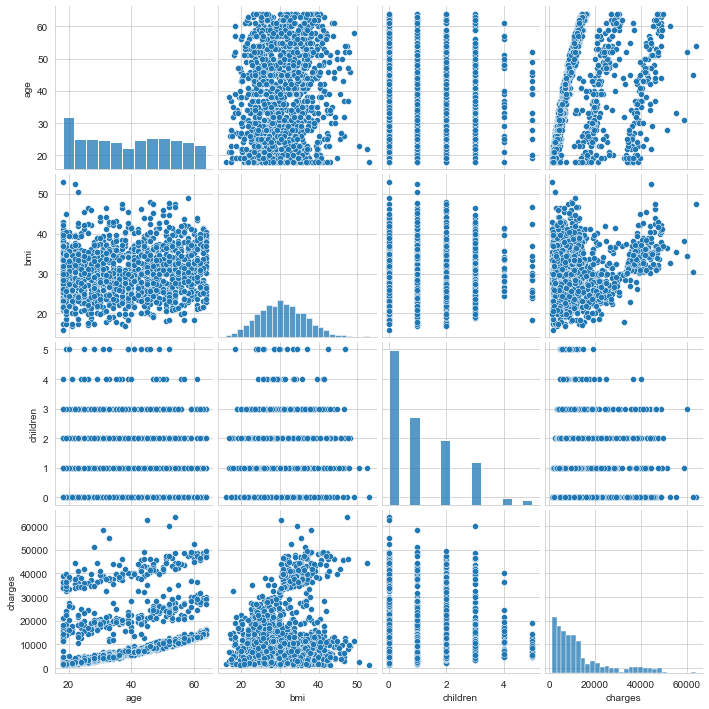

In [17]:
sns.pairplot(data)

### Now look at the Profile Report of this Dataset

In [18]:
proff = ProfileReport(data)

In [19]:
proff

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Now look at the features column one at a time

In [20]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

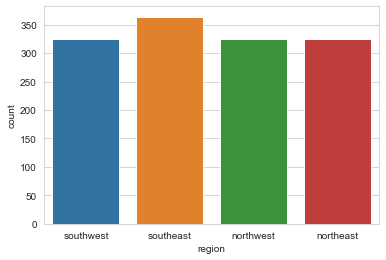

In [21]:
sns.countplot(x = 'region', data = data)

### Visualizing the same for sex

<AxesSubplot:xlabel='sex', ylabel='count'>

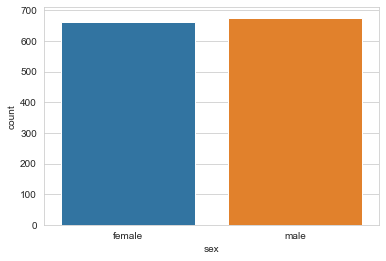

In [22]:
sns.countplot(x = 'sex', data = data)

### Now let's observe the feature *charges*

**A distplot plots a univariate distribution of observations.**


C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

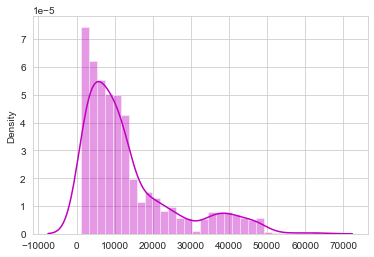

In [23]:
sns.distplot(x= data['charges'], color = 'm')

**If we aplly log function onto that**

C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

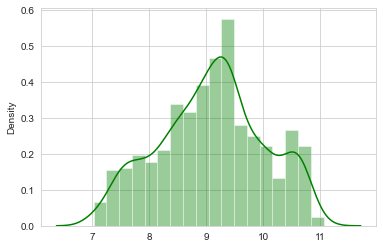

In [24]:
sns.distplot(x = np.log(data['charges']),color = 'g')

### Now let's see the Correlation between the variables using heatmap

<AxesSubplot:>

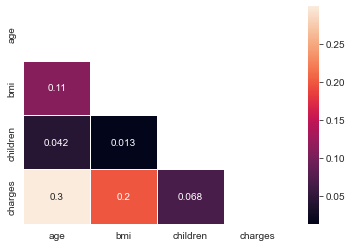

In [25]:
corr = data.corr('pearson')
mask = np.triu(corr)
sns.heatmap(corr, linewidth = 0.5 , mask = mask , annot = True)

### if You want to know m ore about numpy.triu() function please refer to this link below

### [This Link](https://levelup.gitconnected.com/python-numpy-triu-function-7ebf55dd7cef#:~:text=Upper%20triangle%20of%20an%20array,-Technical%20Geek&text=Python%20NumPy%20triu()%20is,triangle%20with%20respect%20to%20k.)

## Variable Transformation
### lets transform the variable from string to discrete integer  values

## But for this we will ReRun the cell which reads the data using pandas 

### And now we will start model building process

In [26]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex=label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker=label.transform(data.smoker)
label.fit(data.region.drop_duplicates())
data.region=label.transform(data.region)

### now prepare our input and output set of data as x and y 
### and split them into to subsets train and test

In [27]:
x=data.drop(['charges'],axis=1)
y=data['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
Lin_reg=LinearRegression()
Lin_reg.fit(x_train,y_train)

LinearRegression()

In [29]:
print(Lin_reg.score(x_test,y_test))

0.7998747145449959


### we can see that Linear Regression has an accuract of 0.799 or 0.8 .
### In other words this model performs 80% with the test data.

### Now look at t6he various models we've imported and how they performs

## Now train the models

In [30]:
linreg = LinearRegression()
rfc = RandomForestRegressor(n_estimators = 500 , max_features = 6 , max_depth = 10 , min_samples_leaf = 6)
abr = AdaBoostRegressor(learning_rate = 0.1 )
gbr = GradientBoostingRegressor()
xgb = XGBRegressor(gamma = 0.5)


In [31]:
models = [linreg, rfc, abr, gbr, xgb]

In [32]:
def training(model):
    score_dict =[]
    error_dict =[]
    for m in model:
        m.fit(x_train,y_train)
        score = m.score(x_test, y_test)
        y_pred = m.predict(x_test)
        model_rmse = mean_squared_error(y_test, y_pred, squared = False)
        print("for the model",m, "the acceuracy & error are ", score, model_rmse)
        score_dict.append(score)
        error_dict.append(model_rmse)
    print("the final Results are :\n")
    print(score_dict)
    print(error_dict)
        

In [33]:
training(models)

for the model LinearRegression() the acceuracy & error are  0.7998747145449959 5643.219748880902
for the model RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=6,
                      n_estimators=500) the acceuracy & error are  0.8986082015815304 4016.7739620376465
for the model AdaBoostRegressor(learning_rate=0.1) the acceuracy & error are  0.8739712078591468 4478.27611306817
for the model GradientBoostingRegressor() the acceuracy & error are  0.8981590369214338 4025.6612646298518
for the model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.5, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_s

### as we can see RandomForestRegressor has the highest accuracy, so we will go with that model


In [34]:
RFC = RandomForestRegressor(n_estimators = 500 , max_features = 6 , max_depth = 10 , min_samples_leaf = 6)
RFC.fit(x_train , y_train)

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=6,
                      n_estimators=500)

In [35]:
score = RFC.score(x_test, y_test)

In [36]:
print(score)

0.8996909421106245


# Conclusion

## we can predict medical charges of a person given the five features age, sex, bmi, children, smoker, region with 89% accuracy. 